# 3주차
- 통신사 고객 이탈 데이터셋
- 캘리포니아에 거주하는 7,043명의 고객들이 사용하는 폰, 인터넷 서비스 관련 내용을 포함
- 이탈 여부를 예측, 이탈 요인을 파악

## 데이터 이해
### Customer_Info
- CustomerID: 고객 구분 아이디
- Gender: 성별
- Age: 나이
- Senior Citizen: 65세 이상 여부 (Yes, No)
- Married: 결혼 여부
- Dependents: 부양자 여부
- Number of Dependents: 부양자 수

### Location_Data
- CustomerID: 고객 구분 아이디
- Country: 주거주지 국가
- State: 주거주지 주
- City: 주거주지 도시
- Zip Code: 주거주지 우편번호 (미국 분할, 각 주 분할, 배달구역 번호로 구성)
- Total Population: Zip Code로 추산한 현재 인구 수
- Latitude: 위도
- Longtitude: 경도

### Online_Services
- CustomerID: 고객 구분 아이디
- Phone Service: 집 전화 서비스 구독 여부
- Internet Service: 인터넷 서비스 구독 여부 (No, DSL, Fiber Optic, Cable)
- Online Security: 온라인 보안 서비스 구독 여부
- Online Backup: 온라인 백업 서비스 구독 여부
- Device Protection Plan: 기기 보안 플랜 구독 여부
- Premium Tech Support: 기술 지원 플랜 구독 여부
- Streaming TV: TV 프로그램 스트리밍 서비스 구독 여부
- Streaming Movies: 영화 스트리밍 서비스 구독 여부
- Streaming Music: 음악 스트리밍 서비스 구독 여부

### Payment_Info
- CustomerID: 고객 구분 아이디
- Contract: 계약 유형 (Month-to-Month, One Year, Two Year)
- Paperless Billing: 전자 영수증 발급 여부
- Payment Method: 결제 수단
- Monthly Charge: 가장 최근 월 결제 금액
- Total Charges: 총 결제 금액
- Total Refunds: 총 환불 금액
- Total Extra Data: 추가 데이터 사용 금액
- Total Long Distance Charges: 지역 통화를 벗어난 통화에 대한 총 요금

### Service_Options
- CustomerID: 고객 구분 아이디
- Tenure in Months: 회사 서비스를 이용한 주기
- Referred a Friend: 친구나 가족에게 추천받은 여부
- Number of Referrals: 고객이 지인에게 추천한 수 
- Avg Monthly GB Download: 평균 다운로드 기가바이트
- Offer: 고객이 수락한 마지막 마케팅 제안
- Phone Service: 집 전화 서비스 구독 여부
- Multiple Lines: 회사 내 다중 전화선 사용 여부

### Status_Analysis
- CustomerID: 고객 구분 아이디
- Satisfation Score: 고객 만족도 (1~5)
- Customer Status: 고객 상태 (Chunred, Stayed, Joined)
- Churn Label: 이탈 여부 (Yes, No)
- Churn Value: 이탈 여부 (0, 1)
- Churn Score: 이탈 가능성 예측 점수 (0~100)

## 각 데이터셋에서 사용할 컬럼
- Customer_Info: Dependents 제외 모두 사용 (Number of Dependents 컬럼 대신)
- Location_Data: Country, State 제외 모두 사용 (국가, 주 동일한 값인지 확인 필요)
- Online_Services: 모두 사용
- Payment_Info: Monthly Charge 제외 모두 사용 (Total Charge 컬럼 대신)
- Service_Options: 모두 사용
- Status_Analysis: CustomerID, Satisfaction Score, Churn Value만 사용

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from datetime import datetime

# preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer
from functools import reduce

# validation
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, cross_val_score

# valuation
from sklearn.metrics import confusion_matrix

# modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# etc 
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기 - Customer_Info
customer_info = pd.read_csv("C:/Users/sssum/Downloads/Customer_Info.csv")
customer_info.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes
1,0003-MKNFE,Male,46,No,No,No,No,0,No
2,0004-TLHLJ,Male,50,No,No,No,No,0,No
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes


In [3]:
# 데이터 기본 정보 확인
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           7043 non-null   object
 1   gender                7043 non-null   object
 2   age                   7043 non-null   int64 
 3   under_30              7043 non-null   object
 4   senior_citizen        7043 non-null   object
 5   partner               7043 non-null   object
 6   dependents            7043 non-null   object
 7   number_of_dependents  7043 non-null   int64 
 8   married               7043 non-null   object
dtypes: int64(2), object(7)
memory usage: 495.3+ KB


- 데이터 정의에 포함되지 않은 'under_30', 'partners' 컬럼 있음.
- 'under_30'은 30세 이하, 'partners'는 동반자 여부를 의미하는 것으로 추정됨.

In [4]:
# 데이터 불러오기 - Location_Data
location_data = pd.read_csv("C:/Users/sssum/Downloads/Location_Data.csv")
location_data.head()

,customer_id,country,state,city,zip_code,total_population,latitude,longitude
0,0002-ORFBO,United States,California,Frazier Park,93225,4498,34.827662,-118.999073
1,0003-MKNFE,United States,California,Glendale,91206,31297,34.162515,-118.203869
2,0004-TLHLJ,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613
3,0011-IGKFF,United States,California,Martinez,94553,46677,38.014457,-122.115432
4,0013-EXCHZ,United States,California,Camarillo,93010,42853,34.227846,-119.079903


In [5]:
# 데이터 기본 정보 확인
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7043 non-null   object 
 1   country           7043 non-null   object 
 2   state             7043 non-null   object 
 3   city              7043 non-null   object 
 4   zip_code          7043 non-null   int64  
 5   total_population  7043 non-null   int64  
 6   latitude          7043 non-null   float64
 7   longitude         7043 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 440.3+ KB


In [6]:
# country, state 컬럼 값 확인인
location_data[['country', 'state']].value_counts()

country        state     
United States  California    7043
dtype: int64

country, state 컬럼값이 모두 동일하므로 삭제 결정

In [7]:
# 데이터 불러오기 - Online_Services
online_services = pd.read_csv("C:/Users/sssum/Downloads/Online_Services.csv")
online_services.head()

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
0,0002-ORFBO,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable
1,0003-MKNFE,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable
2,0004-TLHLJ,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic
3,0011-IGKFF,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic
4,0013-EXCHZ,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic


In [8]:
# 데이터 기본 정보 확인
online_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           7043 non-null   object
 1   phone_service         7043 non-null   object
 2   internet_service      7043 non-null   object
 3   online_security       7043 non-null   object
 4   online_backup         7043 non-null   object
 5   device_protection     7043 non-null   object
 6   premium_tech_support  7043 non-null   object
 7   streaming_tv          7043 non-null   object
 8   streaming_movies      7043 non-null   object
 9   streaming_music       7043 non-null   object
 10  internet_type         7043 non-null   object
dtypes: object(11)
memory usage: 605.4+ KB


In [9]:
# 데이터 불러오기 - Payment_Info
payment_info = pd.read_csv("C:/Users/sssum/Downloads/Payment_Info.csv")
payment_info.head()

,customer_id,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54


In [10]:
# 데이터 기본 정보 확인
payment_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   contract                           7043 non-null   object 
 2   paperless_billing                  7043 non-null   object 
 3   payment_method                     7043 non-null   object 
 4   monthly_ charges                   7043 non-null   float64
 5   avg_monthly_long_distance_charges  7043 non-null   float64
 6   total_charges                      7043 non-null   float64
 7   total_refunds                      7043 non-null   float64
 8   total_extra_data_charges           7043 non-null   int64  
 9   total_long_distance_charges        7043 non-null   float64
 10  total_revenue                      7043 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 605.4+ 

- total_revenue 컬럼은 고객의 총 수입을 의미하는 것으로 추정됨.

In [11]:
# 데이터 불러오기 - Service_Options
service_options = pd.read_csv("C:/Users/sssum/Downloads/Service_Options.csv")
service_options.head()

,customer_id,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals
0,0002-ORFBO,9,Yes,Yes,No,16,Yes,None,Yes,2
1,0003-MKNFE,9,Yes,Yes,Yes,10,No,None,No,0
2,0004-TLHLJ,4,Yes,Yes,No,30,Yes,Offer E,No,0
3,0011-IGKFF,13,Yes,Yes,No,4,Yes,Offer D,Yes,1
4,0013-EXCHZ,3,Yes,Yes,No,11,Yes,None,Yes,3


In [12]:
# 데이터 기본 정보 확인
service_options.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              7043 non-null   object
 1   tenure                   7043 non-null   int64 
 2   internet_service         7043 non-null   object
 3   phone_service            7043 non-null   object
 4   multiple_lines           7043 non-null   object
 5   avg_monthly_gb_download  7043 non-null   int64 
 6   unlimited_data           7043 non-null   object
 7   offer                    7043 non-null   object
 8   referred_a_friend        7043 non-null   object
 9   number_of_referrals      7043 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 550.4+ KB


- 데이터 정의에 포함되지 않은 'unlimited_data' 컬럼이 있음.
- 'unlimited_data' 컬럼은 무제한 데이터 요금제 이용 여부를 나타내는 것으로 추정됨.
- online_services 데이터셋과 중복인 internet_service, phone_service 컬럼 제외 

In [13]:
# 데이터 불러오기 - Status_Analysis
status_analysis = pd.read_csv("C:/Users/sssum/Downloads/Status_Analysis.csv")
status_analysis.head()

,customer_id,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
0,0002-ORFBO,3,2205,Stayed,65,No,0,Not Applicable,NaN
1,0003-MKNFE,5,5414,Stayed,66,No,0,Not Applicable,NaN
2,0004-TLHLJ,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices
3,0011-IGKFF,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability


- churn_category, churn_reason 컬럼은 워드 클라우드로 나타내서 인사이트를 얻을 수 있음.
- 'cltv' 컬럼은 고객 생애 가치를 나타내는 것으로 추정됨.

In [14]:
# 데이터 기본 정보 확인
status_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         7043 non-null   object
 1   satisfaction_score  7043 non-null   int64 
 2   cltv                7043 non-null   int64 
 3   customer_status     7043 non-null   object
 4   churn_score         7043 non-null   int64 
 5   churn_label         7043 non-null   object
 6   churn_value         7043 non-null   int64 
 7   churn_category      7043 non-null   object
 8   churn_reason        1869 non-null   object
dtypes: int64(4), object(5)
memory usage: 495.3+ KB


In [15]:
# 각 데이터셋에서 사용할 컬럼만 선택해서 추출
customer_info = customer_info.drop(columns=['dependents'], axis=1)
location_data = location_data.drop(columns=['country', 'state'], axis=1)
payment_info = payment_info.drop(columns='monthly_ charges', axis=1)
service_options = service_options.drop(columns=['internet_service', 'phone_service'])
churn_reason = status_analysis[['churn_category', 'churn_reason']]
status_analysis = status_analysis[['customer_id', 'satisfaction_score', 'churn_value']]

In [16]:
# 하나의 데이터셋으로 합치기 
dataframes = [customer_info, location_data, online_services, payment_info, service_options, status_analysis]
df = reduce(lambda left, right: pd.merge(left, right, on='customer_id', how='inner'), dataframes)
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   under_30                           7043 non-null   object 
 4   senior_citizen                     7043 non-null   object 
 5   partner                            7043 non-null   object 
 6   number_of_dependents               7043 non-null   int64  
 7   married                            7043 non-null   object 
 8   city                               7043 non-null   object 
 9   zip_code                           7043 non-null   int64  
 10  total_population                   7043 non-null   int64  
 11  latitude                           7043 non-null   float

## EDA

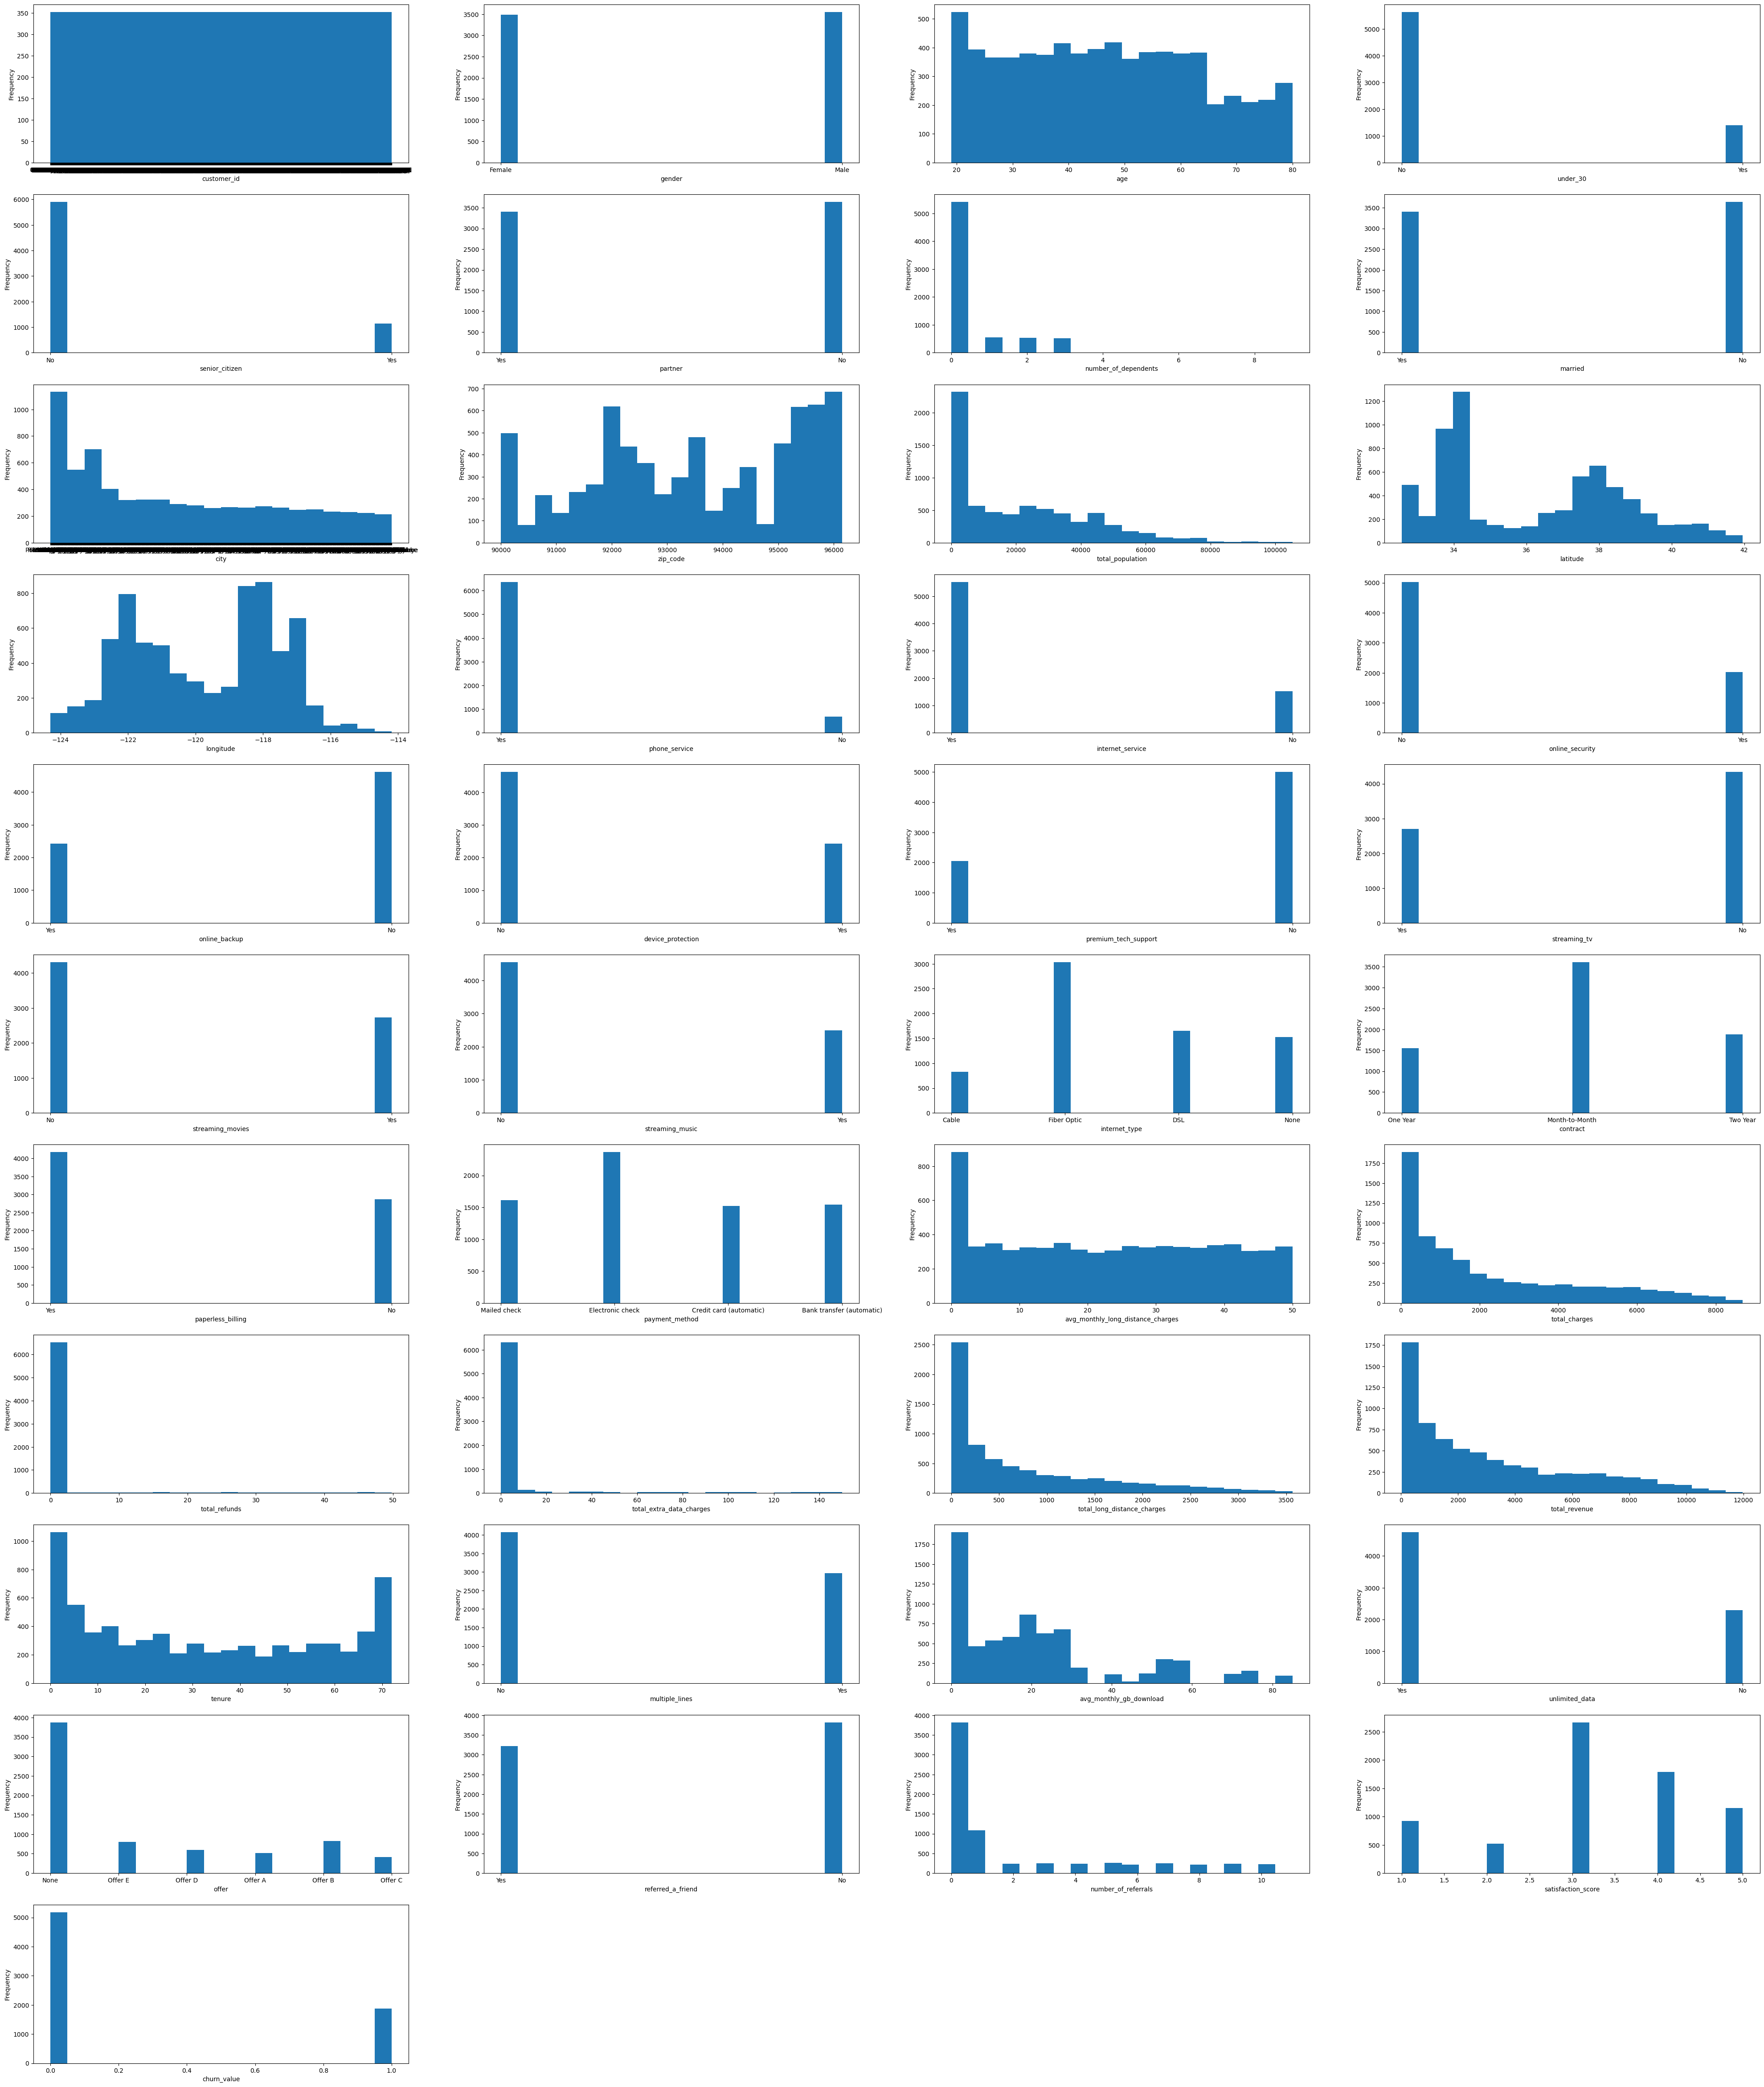

In [21]:
# 속성 분포 확인
fig, ax = plt.subplots(11, 4, figsize=(50, 60)) # (열, 행행)

idx = 0
for i in range(11): # subplot 열
    for j in range(4): # subplot 행
        if idx < len(df.columns):
            colname = list(df.columns)[idx]
            ax[i][j].hist(df[colname], bins=20)
            ax[i][j].set_xlabel(colname)
            ax[i][j].set_ylabel('Frequency')
            idx += 1
        else: 
            ax[i][j].axis('off')

In [17]:
# 기본 통계 정보 확인
df.describe()

,age,number_of_dependents,zip_code,total_population,latitude,longitude,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,avg_monthly_gb_download,number_of_referrals,satisfaction_score,churn_value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.071134,22139.814568,36.197455,-119.756684,22.958954,2280.381264,1.962182,6.860713,749.099262,3034.379056,32.371149,20.515405,1.951867,3.244924,0.265370
std,16.750352,0.962802,1856.768045,21152.174407,2.468929,2.154425,15.448113,2266.220462,7.902614,25.104978,846.660055,2865.204542,24.559481,20.418940,3.001199,1.201657,0.441561
min,19.000000,0.000000,90001.000000,11.000000,32.555828,-124.301372,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32.000000,0.000000,92101.000000,2344.000000,33.990646,-121.788090,9.210000,400.150000,0.000000,0.000000,70.545000,605.610000,9.000000,3.000000,0.000000,3.000000,0.000000
50%,46.000000,0.000000,93518.000000,17554.000000,36.205465,-119.595293,22.890000,1394.550000,0.000000,0.000000,401.440000,2108.640000,29.000000,17.000000,0.000000,3.000000,0.000000
75%,60.000000,0.000000,95329.000000,36125.000000,38.161321,-117.969795,36.395000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,55.000000,27.000000,3.000000,4.000000,1.000000
max,80.000000,9.000000,96150.000000,105285.000000,41.962127,-114.192901,49.990000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,72.000000,85.000000,11.000000,5.000000,1.000000


- total_population, total_charges, avg_monthly_gb_download 컬럼들의 각 평균과 표준편차가 비슷한 수준이므로 분포가 퍼져있음을 알 수 있음.
- 각 컬럼들의 값 범위가 크게 달라서 스케일링 작업도 필요함.

In [18]:
# 범주형 통계 정보 확인
df.describe(include='object')

,customer_id,gender,under_30,senior_citizen,partner,married,city,phone_service,internet_service,online_security,...,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,multiple_lines,unlimited_data,offer,referred_a_friend
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,1106,2,2,2,...,2,2,4,3,2,4,2,2,6,2
top,0002-ORFBO,Male,No,No,No,No,Los Angeles,Yes,Yes,No,...,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,No,Yes,None,No
freq,1,3555,5642,5901,3641,3641,293,6361,5517,5024,...,4311,4555,3035,3610,4171,2365,4072,4745,3877,3821


<Axes: ylabel='satisfaction_score'>

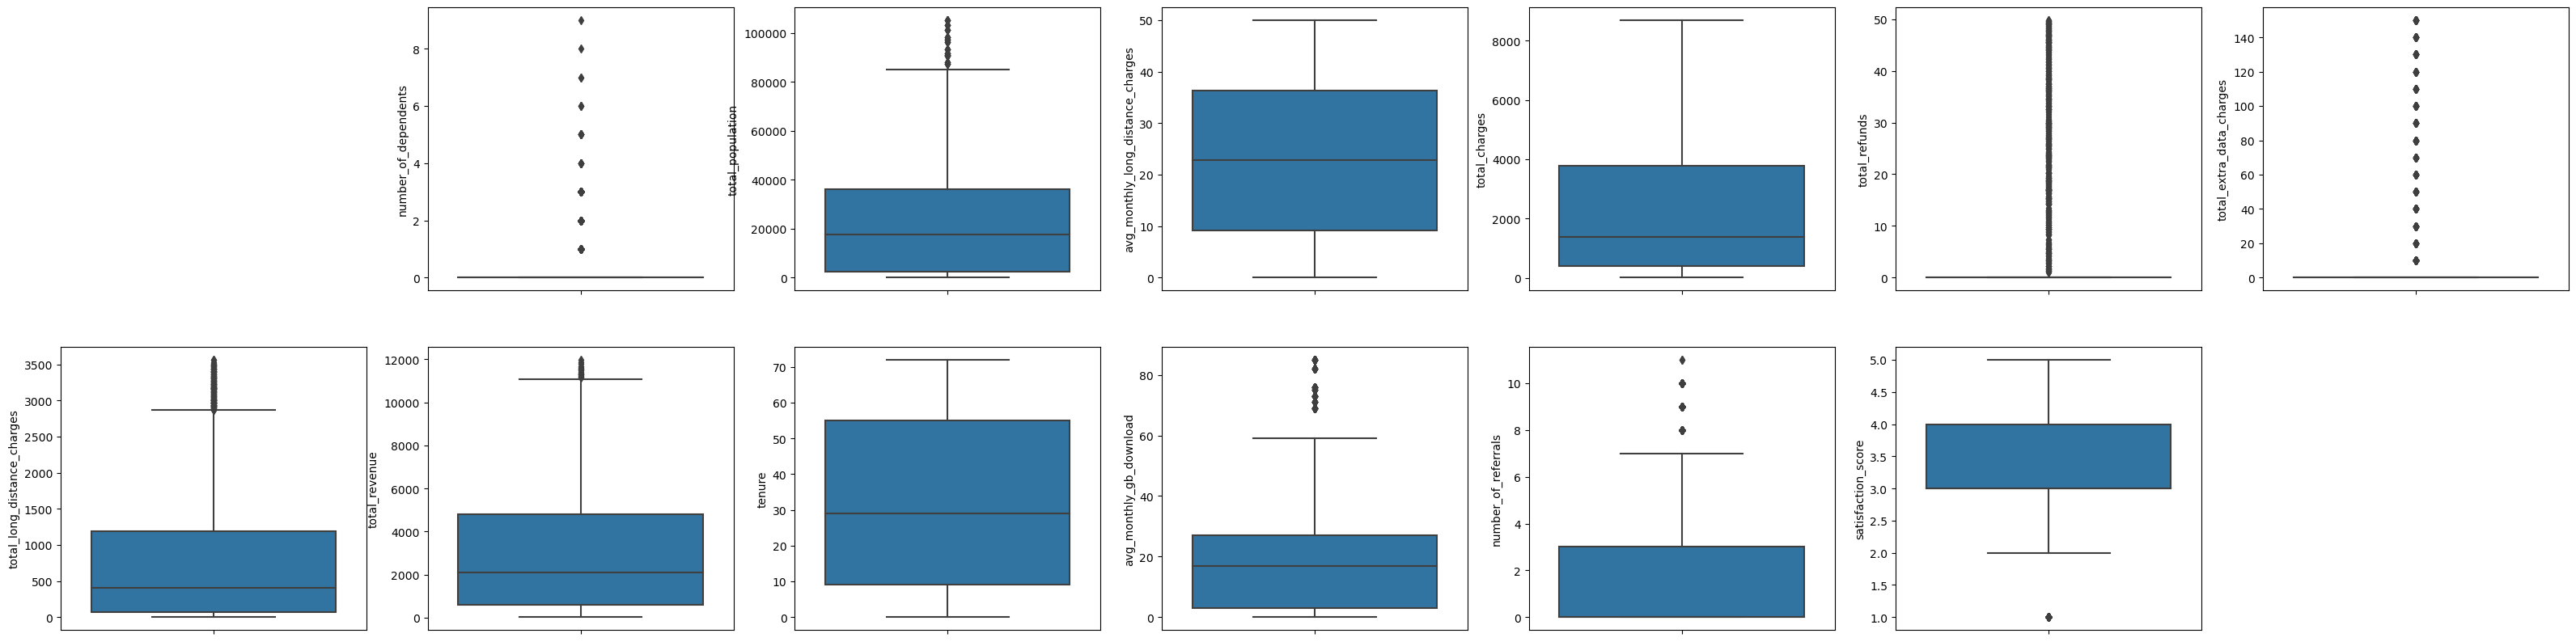

In [29]:
# 이상치 탐지
plt.figure(figsize=(40, 10))
sns.boxplot(data=df, y='age')
plt.subplot(2, 7, 2)
sns.boxplot(data=df, y='number_of_dependents')
plt.subplot(2, 7, 3)
sns.boxplot(data=df, y='total_population')
plt.subplot(2, 7, 4)
sns.boxplot(data=df, y='avg_monthly_long_distance_charges')
plt.subplot(2, 7, 5)
sns.boxplot(data=df, y='total_charges')
plt.subplot(2, 7, 6)
sns.boxplot(data=df, y='total_refunds')
plt.subplot(2, 7, 7)
sns.boxplot(data=df, y='total_extra_data_charges')
plt.subplot(2, 7, 8)
sns.boxplot(data=df, y='total_long_distance_charges')
plt.subplot(2, 7, 9)
sns.boxplot(data=df, y='total_revenue')
plt.subplot(2, 7, 10)
sns.boxplot(data=df, y='tenure')
plt.subplot(2, 7, 11)
sns.boxplot(data=df, y='avg_monthly_gb_download')
plt.subplot(2, 7, 12)
sns.boxplot(data=df, y='number_of_referrals')
plt.subplot(2, 7, 13)
sns.boxplot(data=df, y='satisfaction_score')

이상치로 보여지는 컬럼
- number_of_dependents, total_population, total_refunds, total_extra_data_charges, total_long_distance_charges, total_revenue, avg_monthly_gb_download, number_of_referrals, stisfaction_score
- 고객 이탈 분석에서는 범위 외 값들이 존재할 수 있으며, 음수나 해당 컬럼 주제에 맞지 않는 값들은 없다고 판단되어 그대로 두고 분석을 진행함.
- 예시 분석과 모델링 결과가 크게 다르다고 판단되면 다시 이상치를 제거하고 분석 실행함.

<Axes: >

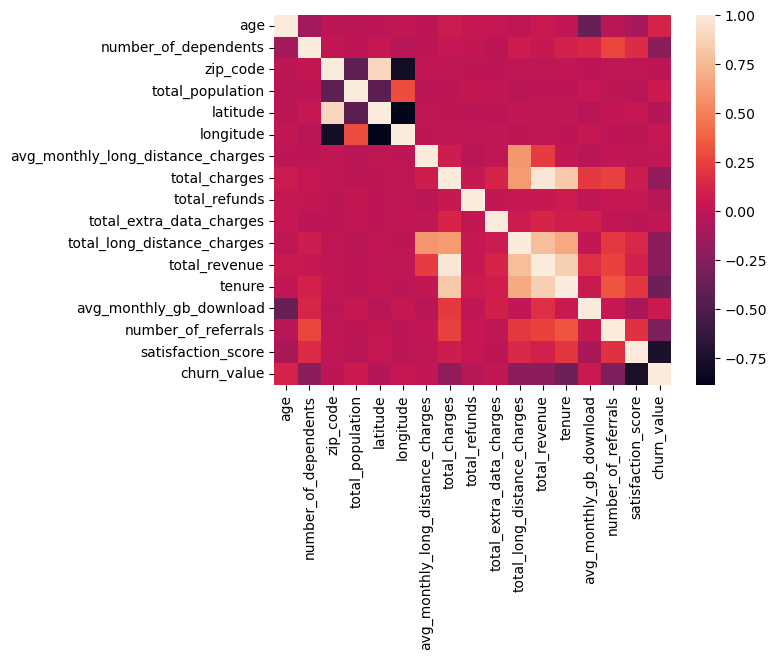

In [22]:
# 컬럼 간 상관관계 파악
sns.heatmap(df.corr())

- 모델링을 위해 zip_code, latitude, longitude 컬럼들이 상관관계가 매우 높으므로 모두 제거
- satisfaction_score와 churn_value 컬럼이 상관관계가 매우 높으므로 satisfaction_score 제거

In [23]:
# 상관관계가 높은 컬럼들 제거
df = df.drop(columns=['zip_code', 'latitude', 'longitude', 'satisfaction_score'], axis=1)

<Axes: >

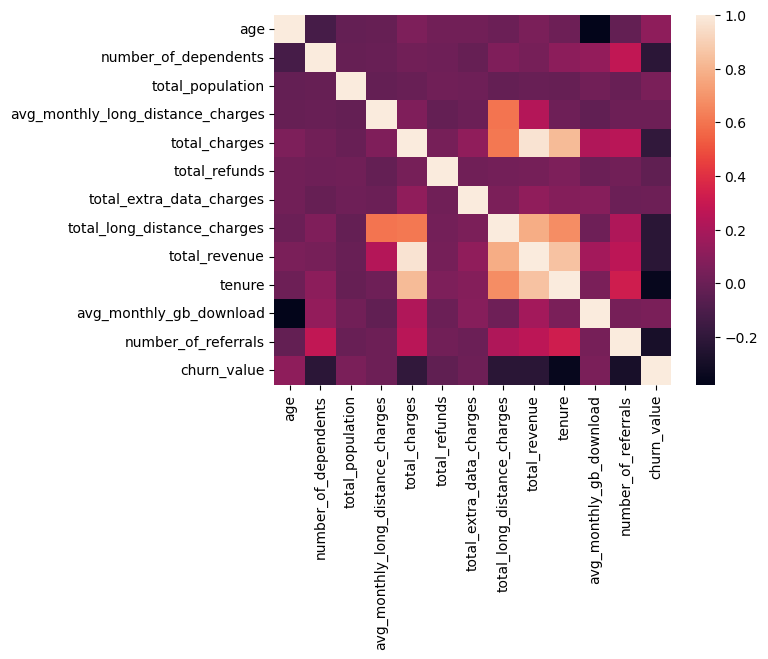

In [24]:
# 컬럼 간 상관관계 파악
sns.heatmap(df.corr())

In [25]:
df.corr()

,age,number_of_dependents,total_population,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,avg_monthly_gb_download,number_of_referrals,churn_value
age,1.000000,-0.119000,-0.018872,-0.011749,0.059684,0.024168,0.025036,0.003065,0.048265,0.010202,-0.376595,-0.025141,0.115760
number_of_dependents,-0.119000,1.000000,-0.015491,-0.007324,0.022535,0.014023,-0.014436,0.068966,0.038038,0.107689,0.129966,0.278003,-0.218780
total_population,-0.018872,-0.015491,1.000000,-0.018669,-0.006436,0.019639,0.012031,-0.018647,-0.010549,-0.012390,0.024759,-0.007702,0.051655
avg_monthly_long_distance_charges,-0.011749,-0.007324,-0.018669,1.000000,0.069500,-0.018644,0.002414,0.599828,0.232291,0.014705,-0.030455,0.006336,0.008120
total_charges,0.059684,0.022535,-0.006436,0.069500,1.000000,0.039558,0.121859,0.610185,0.972212,0.826011,0.223268,0.250378,-0.198546
total_refunds,0.024168,0.014023,0.019639,-0.018644,0.039558,1.000000,0.016755,0.028113,0.036984,0.059137,0.002397,0.024756,-0.033709
total_extra_data_charges,0.025036,-0.014436,0.012031,0.002414,0.121859,0.016755,1.000000,0.058871,0.122496,0.082381,0.088939,0.000350,0.007139
total_long_distance_charges,0.003065,0.068966,-0.018647,0.599828,0.610185,0.028113,0.058871,1.000000,0.778559,0.674083,0.011373,0.216190,-0.223756
total_revenue,0.048265,0.038038,-0.010549,0.232291,0.972212,0.036984,0.122496,0.778559,1.000000,0.853078,0.180726,0.261853,-0.223003
tenure,0.010202,0.107689,-0.012390,0.014705,0.826011,0.059137,0.082381,0.674083,0.853078,1.000000,0.049408,0.326386,-0.352229
